**Aim**: To classify Indian Currency using CNN

**About Dataset:** 
It contains images of the indian currency. Dataset is divided into two parts: 1) *Training* (contains 2400 images i.e 400 images each class)       2) *Testing* (contains 171 images)

It has 6 classes (ten, twenty, fifty, hundred, five hundred, thousand).

dataset link: https://drive.google.com/open?id=1aGO-_-7in5xAcAz-q8wxlKAj9Y6eg6Yi


In [0]:
import cv2
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import os
import random
import gc

In [0]:
test_dir='dataset/test' 
train_dir='dataset/train'

In [0]:
train_fifty=['dataset/train/{}'.format(i) for i in os.listdir(train_dir) if 'fifty' in i]
train_fivehundred=['dataset/train/{}'.format(i) for i in os.listdir(train_dir) if 'fivehund' in i]
train_hundred=['dataset/train/{}'.format(i) for i in os.listdir(train_dir) if 'hundred' in i]
train_ten=['dataset/train/{}'.format(i) for i in os.listdir(train_dir) if 'ten' in i]
train_twenty=['dataset/train/{}'.format(i) for i in os.listdir(train_dir) if 'twenty' in i]
train_thousand=['dataset/train/{}'.format(i) for i in os.listdir(train_dir) if 'thousand' in i]

In [0]:
test_imgs=['dataset/test/{}'.format(i) for i in os.listdir(test_dir)]

In [0]:
train_imgs=train_fifty[:400]+train_fivehundred[:400]+train_hundred[:400]+train_ten[:400]+train_twenty[:400]+train_thousand[:400]
random.shuffle(train_imgs)

In [0]:
len(train_imgs)

2400

In [0]:
nrows=100
ncolumns=100
channels=3

In [0]:
def read_and_process_image(list_of_images):
    '''
    returns X (array of resized images)
    and Y(array of labels)
    
    0-fifty
    1-fivehundred
    2-hundred
    3-ten
    4-thousand
    '''
    X=[]
    Y=[]
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR),(nrows,ncolumns),interpolation=cv2.INTER_CUBIC))
        #temp = cv2.imread(image,channels)
        #cv2.resize(temp,(nrows,ncolumns))
        #X.append(temp)
        if 'fifty' in image:
            Y.append(0)
        elif 'fivehund' in image:
            Y.append(1)
        elif 'hundred' in image:
            Y.append(2)
        elif 'thousand' in image:
            Y.append(4)
        elif 'twenty' in image:
            Y.append(5)
        else:
            Y.append(3)

    return X,Y

In [0]:
X,Y=read_and_process_image(train_imgs)

In [0]:
np.unique(Y,return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([400, 400, 400, 400, 400, 400]))

Text(0.5, 1.0, 'Dataset Distribution')

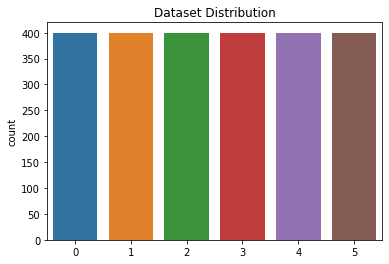

In [0]:
import seaborn as sns

X=np.array(X)
Y=np.array(Y)

sns.countplot(Y)
plt.title('Dataset Distribution')

In [0]:
from keras.utils import to_categorical
Y=to_categorical(Y, num_classes=6) #converts into hot vector

In [0]:
np.shape(Y)

(2400, 6)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2, random_state=2)

print("Shape of train images: ", X_train.shape)
print("Shape of validation images: ", X_val.shape)
print("Shape of train lables images: ", Y_train.shape)
print("Shape of validation labels images: ", Y_val.shape)

Shape of train images:  (1920, 100, 100, 3)
Shape of validation images:  (480, 100, 100, 3)
Shape of train lables images:  (1920, 6)
Shape of validation labels images:  (480, 6)


In [0]:
print(X.shape)
print(Y.shape)

del X
del Y
gc.collect() #garbage collector

(2400, 100, 100, 3)
(2400, 6)


26

In [0]:
ntrain=len(X_train)
nval=len(X_val)

batch_size=32

In [0]:
from keras import layers
from keras import models
from keras import optimizers

In [0]:
#model
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)        

In [0]:
from keras.optimizers import Adam

In [0]:
#model compilation
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [0]:
#model run
model.fit(X_train,Y_train,batch_size=batch_size,verbose=1,epochs=70,validation_data=(X_val,Y_val))

Train on 1920 samples, validate on 480 samples
Epoch 1/70
1920/1920 [==============================] - 20s 10ms/step - loss: 4.3758 - accuracy: 0.1786 - val_loss: 1.7814 - val_accuracy: 0.1833
Epoch 2/70
1920/1920 [==============================] - 20s 10ms/step - loss: 1.7911 - accuracy: 0.1922 - val_loss: 1.7691 - val_accuracy: 0.2917
Epoch 3/70
1920/1920 [==============================] - 20s 10ms/step - loss: 1.7899 - accuracy: 0.1875 - val_loss: 1.8684 - val_accuracy: 0.1562
Epoch 4/70
1920/1920 [==============================] - 20s 10ms/step - loss: 1.7916 - accuracy: 0.1714 - val_loss: 1.7836 - val_accuracy: 0.1583
Epoch 5/70
1920/1920 [==============================] - 20s 10ms/step - loss: 1.7875 - accuracy: 0.1828 - val_loss: 1.7899 - val_accuracy: 0.1813
Epoch 6/70
1920/1920 [==============================] - 21s 11ms/step - loss: 1.7934 - accuracy: 0.1755 - val_loss: 1.7899 - val_accuracy: 0.1667
Epoch 7/70
1920/1920 [==============================] - 24s 12ms/step - loss:

In [0]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [0]:
random.shuffle(test_imgs)
X_test,Y_test=read_and_process_image(test_imgs)    
np.unique(Y_test,return_counts=True)  

In [0]:
Y_predict = model.predict_classes(np.array(X_test))

In [0]:
print("Test Accuracy = ", accuracy_score(Y_predict,Y_test))

Test Accuracy =  0.39766081871345027


In [0]:
print(confusion_matrix(Y_predict,Y_test))

[[ 3  0  3  0  2  0]
 [39  2  5 17  1  1]
 [ 1  0  4  0  1  0]
 [ 4  0  0  5  5  3]
 [ 0  0  1  0 24  3]
 [ 0  0  0 13  4 30]]


In [0]:
print(classification_report(Y_predict,Y_test))

              precision    recall  f1-score   support

           0       0.06      0.38      0.11         8
           1       1.00      0.03      0.06        65
           2       0.31      0.67      0.42         6
           3       0.14      0.29      0.19        17
           4       0.65      0.86      0.74        28
           5       0.81      0.64      0.71        47

    accuracy                           0.40       171
   macro avg       0.50      0.48      0.37       171
weighted avg       0.74      0.40      0.38       171

